# Testing DSS Fragmentation Functions 

In [1]:
%%javascript
IPython.load_extensions('codefolding/main')

<IPython.core.display.Javascript object>

In [2]:
# load libs
import sys,os
from math import isnan
import matplotlib
import numpy as np
import matplotlib.pyplot as py
import matplotlib.gridspec as gridspec
from matplotlib import ticker
import matplotlib
from tools import save, load,ProgressBar,fill_between
from prettytable import PrettyTable
%matplotlib inline  
%config InlineBackend.figure_format = 'retina'
%load_ext autoreload
%autoreload 2
from matplotlib import rc
from scipy.stats import chi2 as spchi2
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
rc('text', usetex=True)  
tex = lambda x: r'$\mathrm{'+x+'}$'
from matplotlib.backends.backend_pdf import PdfPages
from FF.FF import FragFuncs
import FF.fDSS as fDSS

#Pions

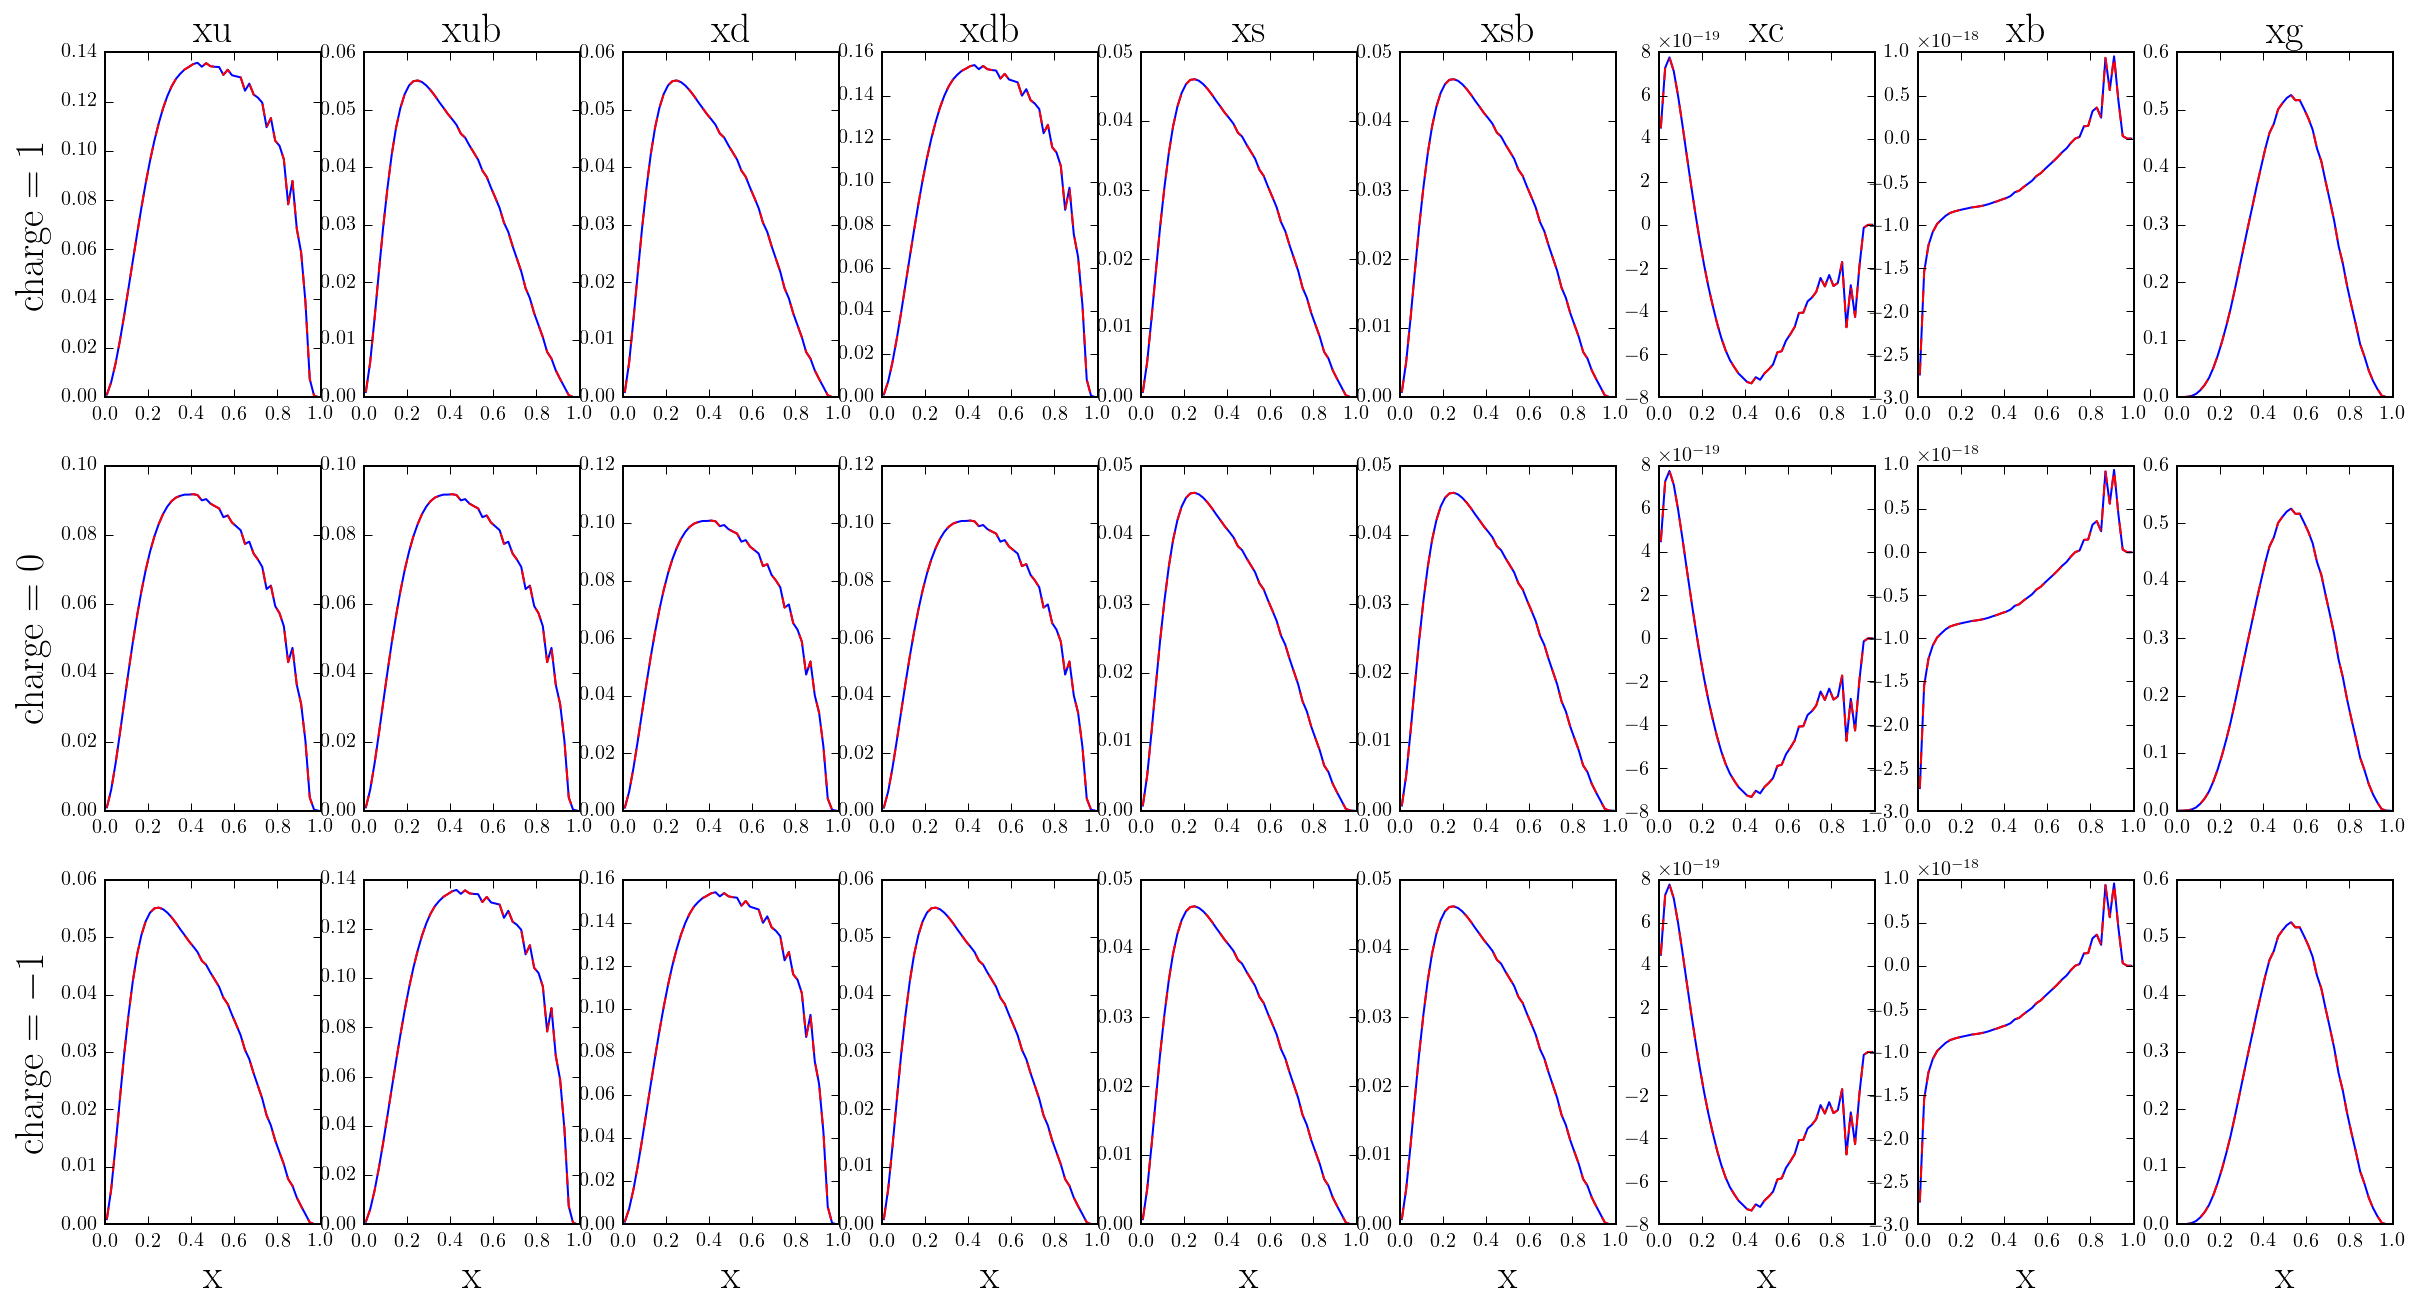

In [3]:
# load pion table
PI=FragFuncs('FF/tables/PILO.TAB')

# reset fdss flag
fDSS.fragini.fini=0

# define kinematics & flavs
Q2=1.0
X=np.linspace(0.01,0.99)
FLAVS=['u','ub','d','db','s','sb','c','b','g']
ih=1 # hadron flag
io=0 # pQCD order: 0==LO 1==NLO

# data frame to fill ff from fortran
fcode={1:{},0:{},-1:{}}
for f in FLAVS: fcode[ 1][f]=np.zeros(X.size)
for f in FLAVS: fcode[ 0][f]=np.zeros(X.size)
for f in FLAVS: fcode[-1][f]=np.zeros(X.size)

# fill data 
for ic in [1,0,-1]:
    for i in range(X.size):
        u,ub,d,db,s,sb,c,b,g = fDSS.fdss(ih,ic,io,X[i],Q2)
        fcode[ic]['u'][i]=u
        fcode[ic]['ub'][i]=ub
        fcode[ic]['d'][i]=d
        fcode[ic]['db'][i]=db
        fcode[ic]['s'][i]=s
        fcode[ic]['sb'][i]=sb
        fcode[ic]['c'][i]=c
        fcode[ic]['b'][i]=b
        fcode[ic]['g'][i]=g

# setup plotter
py.figure(figsize=(20.5,10.5))
gs = gridspec.GridSpec(3,9)

row=-1
for ic in [1,0,-1]:
    row+=1
    col=-1
    for flav in FLAVS:
        col+=1
        ax=py.subplot(gs[row,col])
        FF=np.array([x*PI.get_FF(x,Q2,flav,ic) for x in X])
        ax.plot(X,FF,'b-',label='python')
        ax.plot(X,X*fcode[ic][flav],'r--',label='fortran')
        if row==0: ax.set_title(tex('x'+flav),size=20)
        if row==2: ax.set_xlabel(tex('x'),size=20)
        if col==0: ax.set_ylabel(tex('charge='+str(ic)),size=20)
        

#Kaons

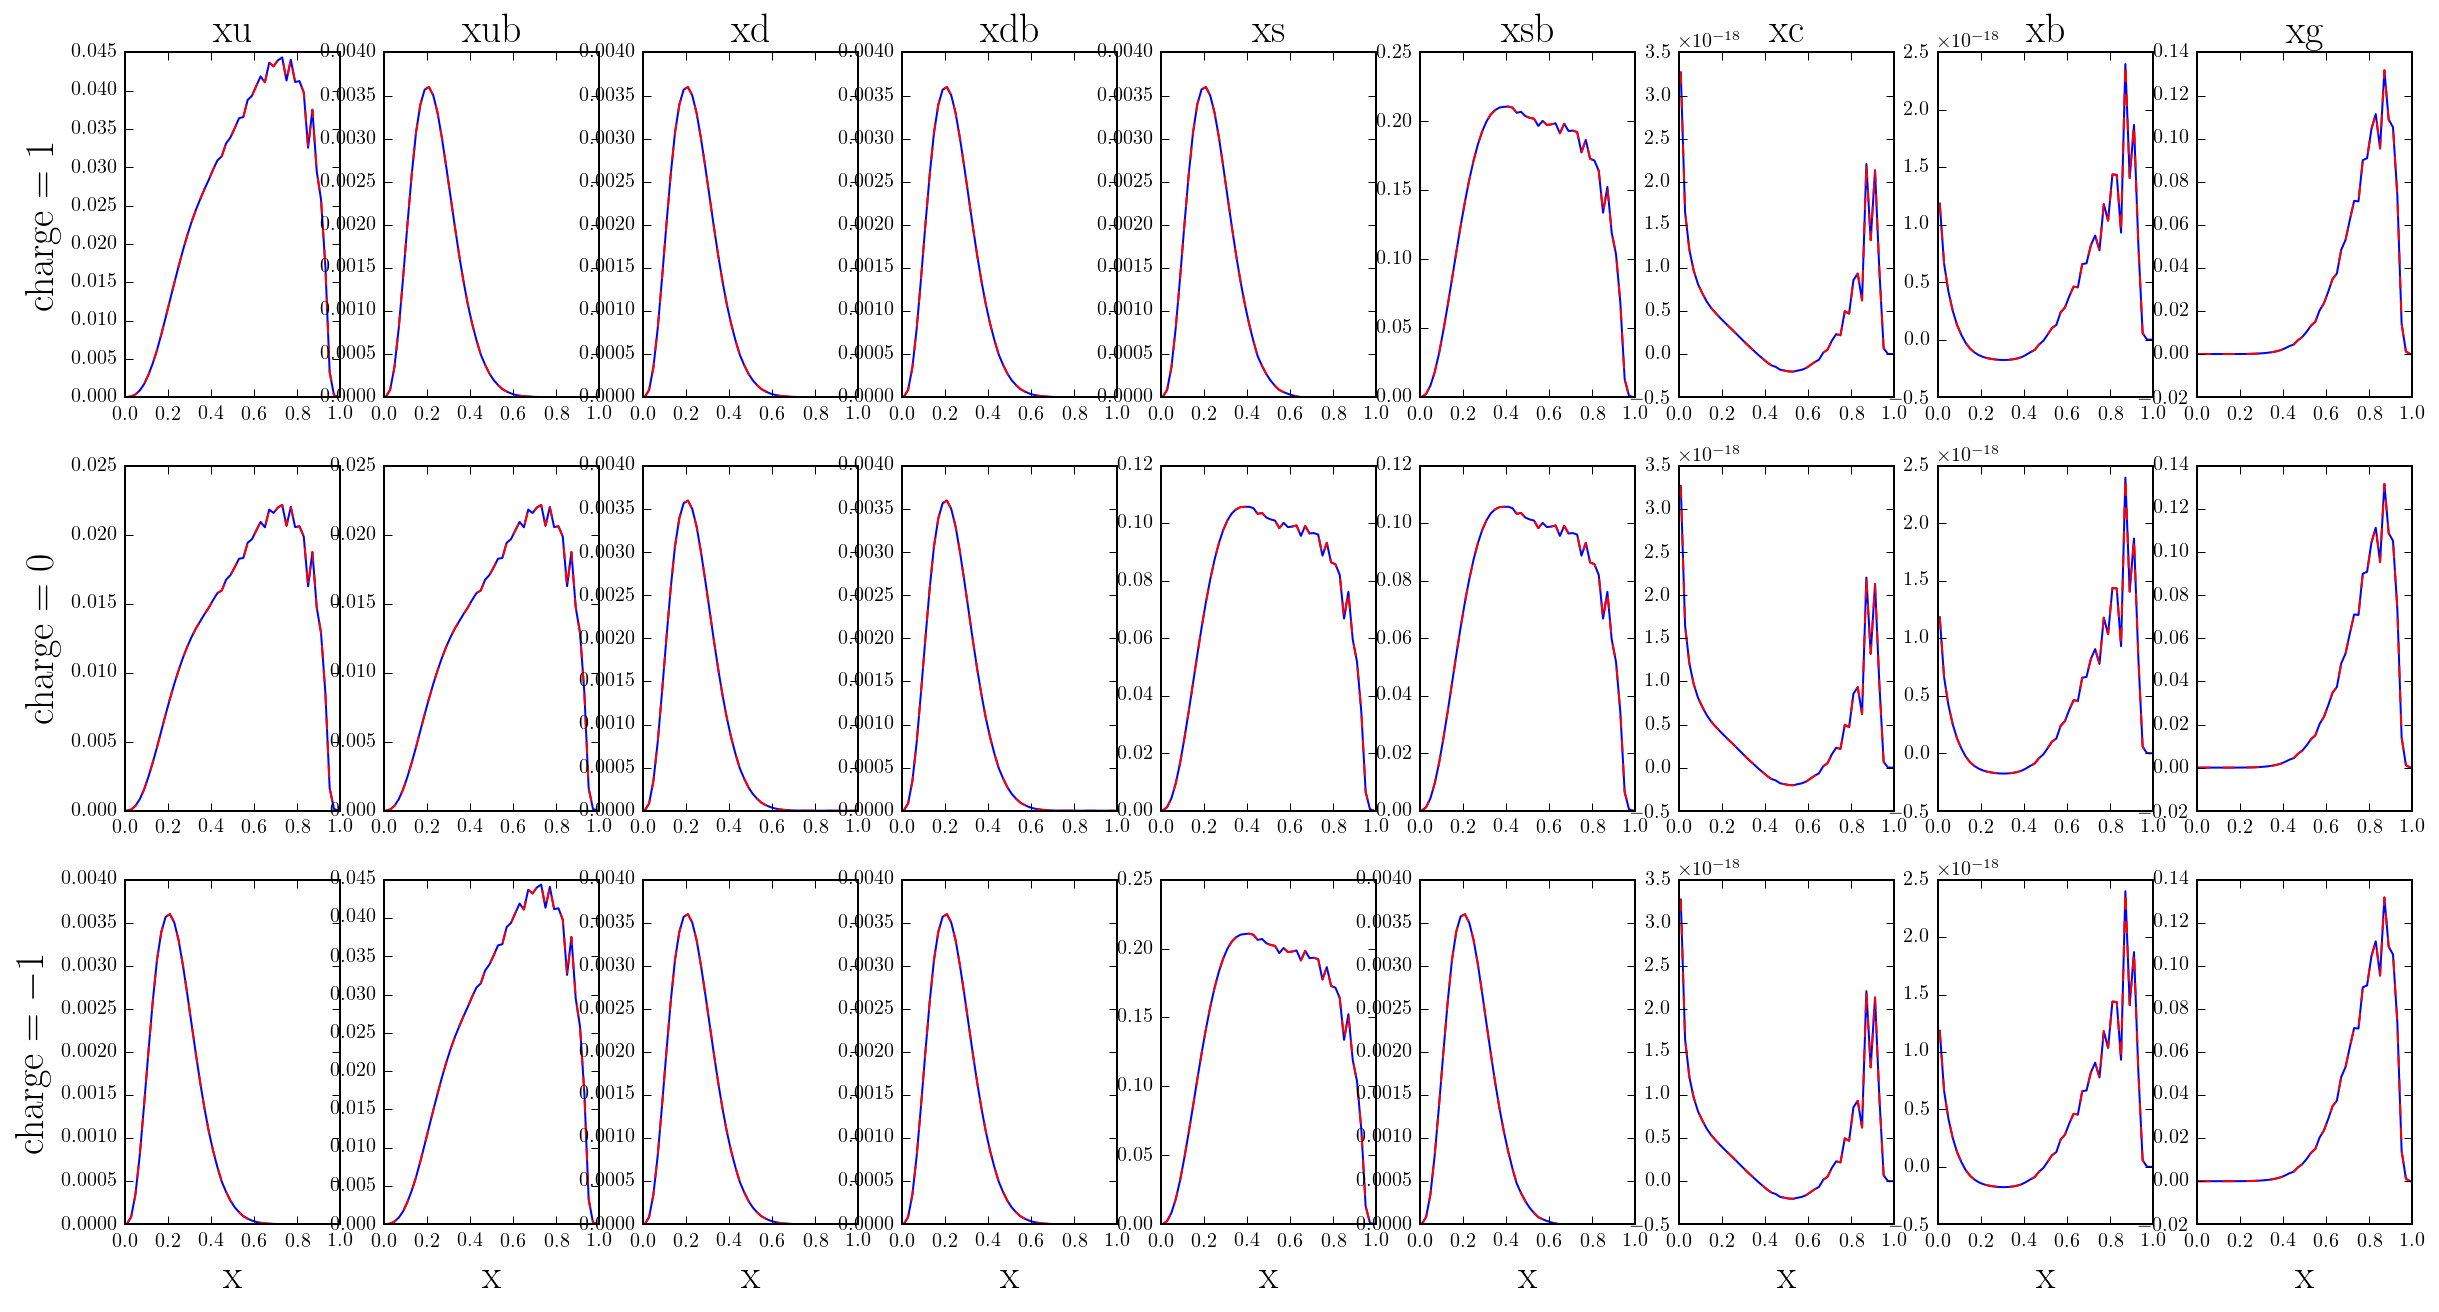

In [4]:
# load pion table
KA=FragFuncs('FF/tables/KALO.TAB')

# reset fdss flag
fDSS.fragini.fini=0

# define kinematics & flavs
Q2=1.0
X=np.linspace(0.01,0.99)
FLAVS=['u','ub','d','db','s','sb','c','b','g']
ih=2 # hadron flag
io=0 # pQCD order: 0==LO 1==NLO

# data frame to fill ff from fortran
fcode={1:{},0:{},-1:{}}
for f in FLAVS: fcode[ 1][f]=np.zeros(X.size)
for f in FLAVS: fcode[ 0][f]=np.zeros(X.size)
for f in FLAVS: fcode[-1][f]=np.zeros(X.size)

# fill data 
for ic in [1,0,-1]:
    for i in range(X.size):
        u,ub,d,db,s,sb,c,b,g = fDSS.fdss(ih,ic,io,X[i],Q2)
        fcode[ic]['u'][i]=u
        fcode[ic]['ub'][i]=ub
        fcode[ic]['d'][i]=d
        fcode[ic]['db'][i]=db
        fcode[ic]['s'][i]=s
        fcode[ic]['sb'][i]=sb
        fcode[ic]['c'][i]=c
        fcode[ic]['b'][i]=b
        fcode[ic]['g'][i]=g

# setup plotter
py.figure(figsize=(20.5,10.5))
gs = gridspec.GridSpec(3,9)

row=-1
for ic in [1,0,-1]:
    row+=1
    col=-1
    for flav in FLAVS:
        col+=1
        ax=py.subplot(gs[row,col])
        FF=np.array([x*KA.get_FF(x,Q2,flav,ic) for x in X])
        ax.plot(X,FF,'b-',label='python')
        ax.plot(X,X*fcode[ic][flav],'r--',label='fortran')
        if row==0: ax.set_title(tex('x'+flav),size=20)
        if row==2: ax.set_xlabel(tex('x'),size=20)
        if col==0: ax.set_ylabel(tex('charge='+str(ic)),size=20)
        

# Charged Hadrons

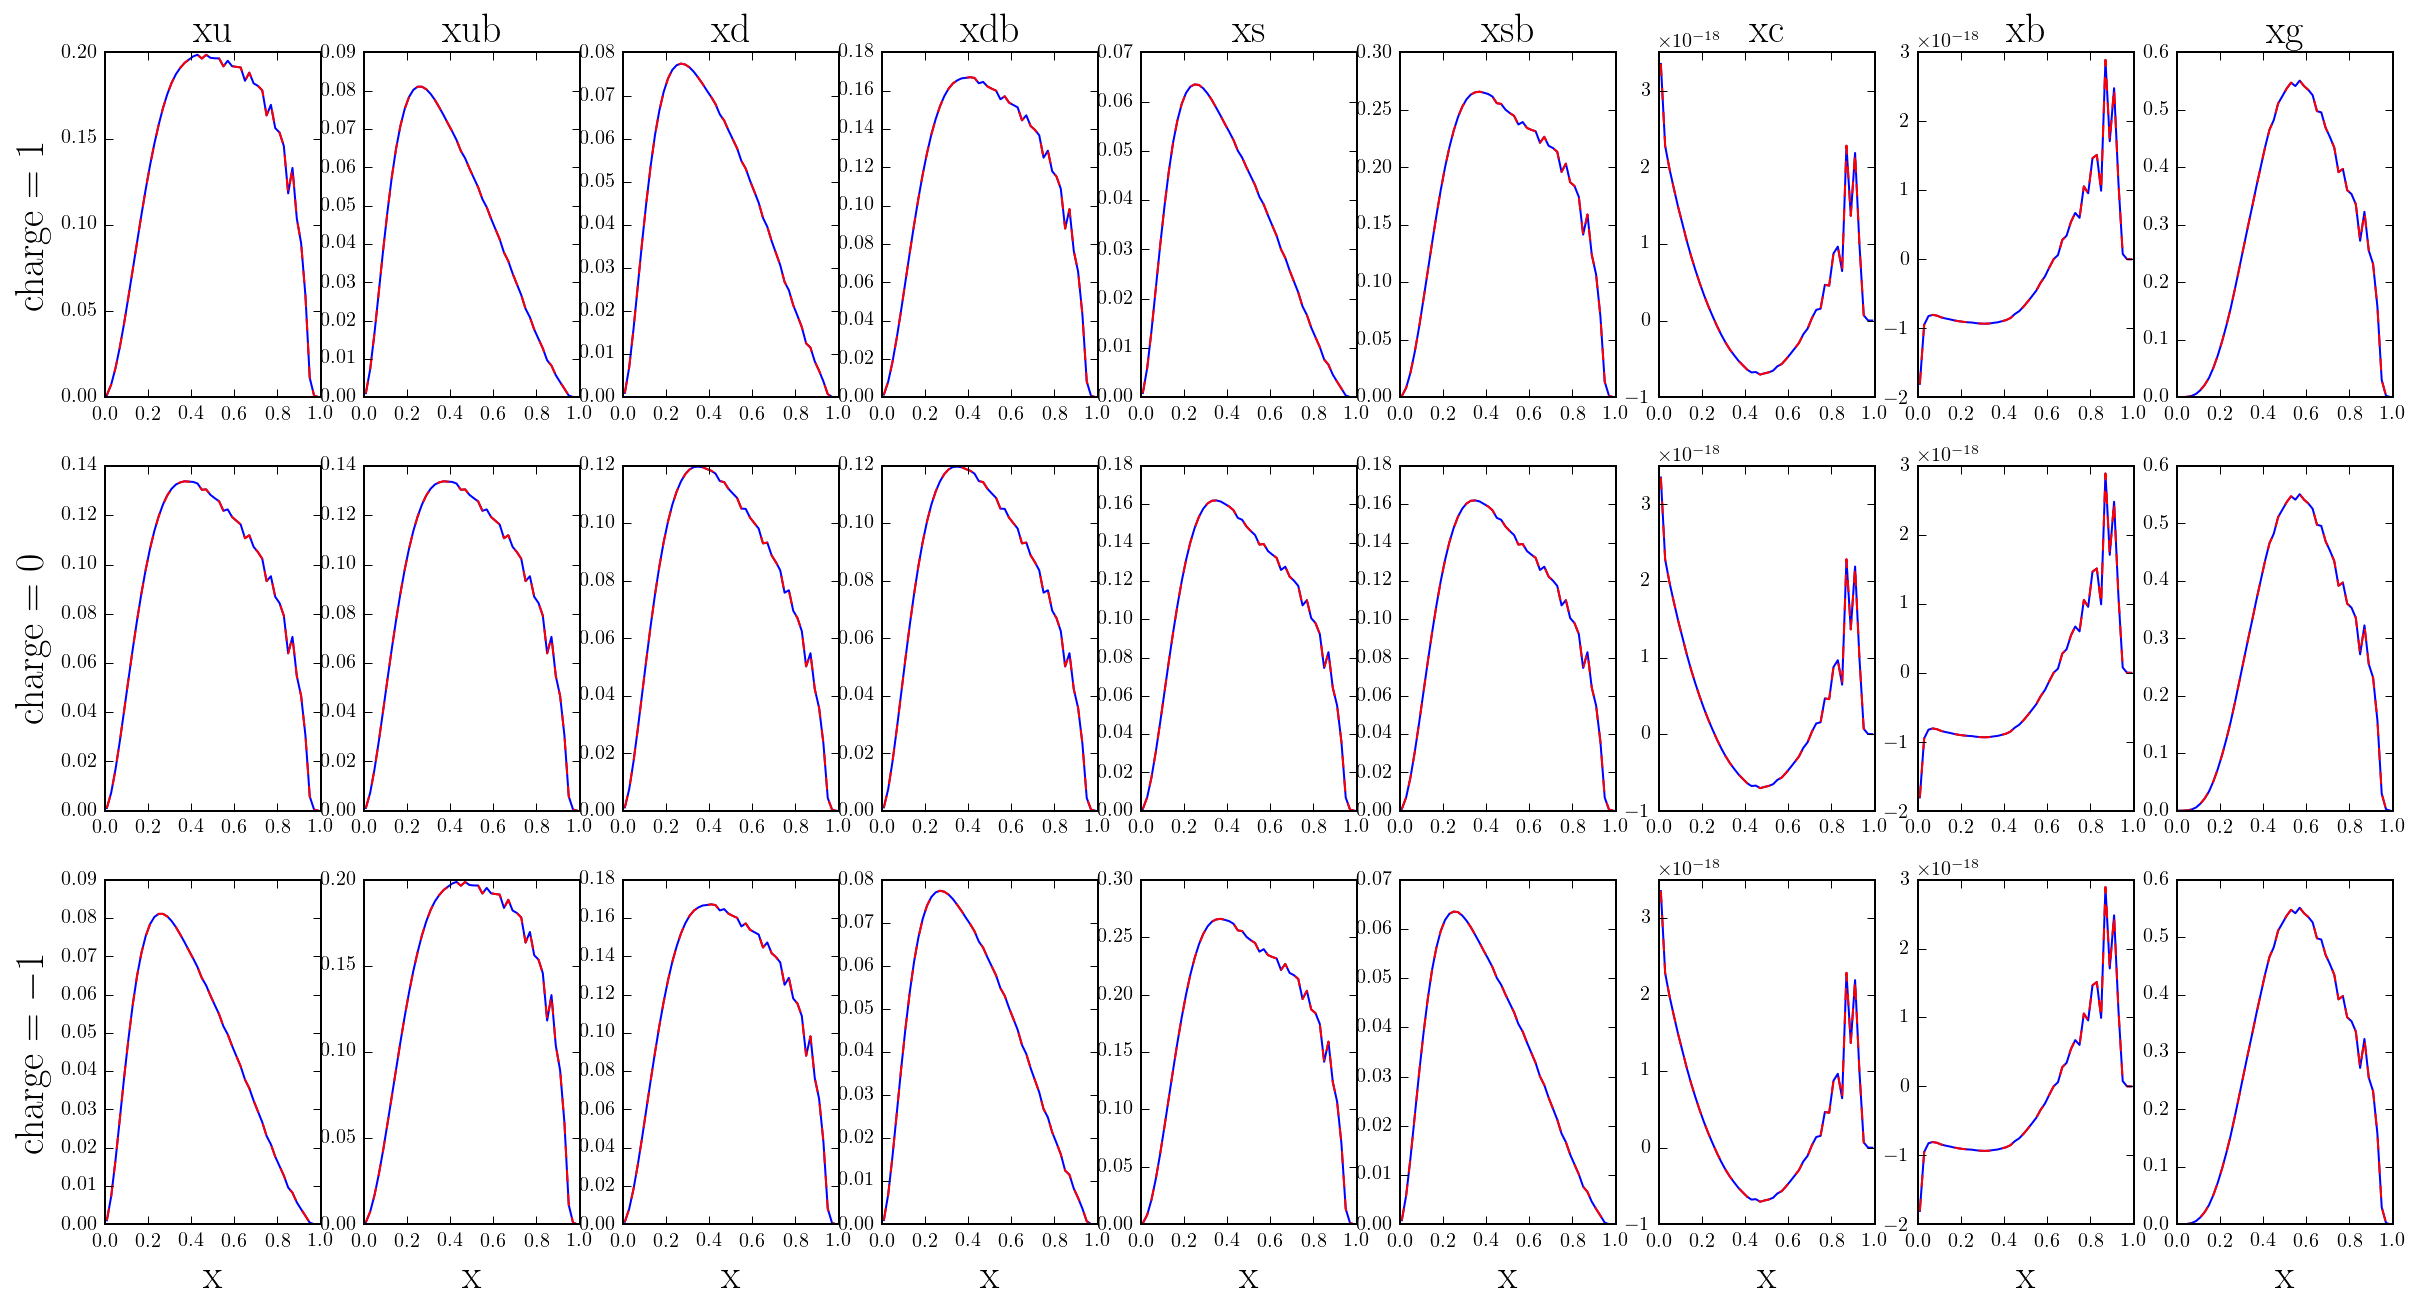

In [5]:
# load pion table
H=FragFuncs('FF/tables/HLO.TAB')

# reset fdss flag
fDSS.fragini.fini=0

# define kinematics & flavs
Q2=1.0
X=np.linspace(0.01,0.99)
FLAVS=['u','ub','d','db','s','sb','c','b','g']
ih=4 # hadron flag
io=0 # pQCD order: 0==LO 1==NLO

# data frame to fill ff from fortran
fcode={1:{},0:{},-1:{}}
for f in FLAVS: fcode[ 1][f]=np.zeros(X.size)
for f in FLAVS: fcode[ 0][f]=np.zeros(X.size)
for f in FLAVS: fcode[-1][f]=np.zeros(X.size)

# fill data 
for ic in [1,0,-1]:
    for i in range(X.size):
        u,ub,d,db,s,sb,c,b,g = fDSS.fdss(ih,ic,io,X[i],Q2)
        fcode[ic]['u'][i]=u
        fcode[ic]['ub'][i]=ub
        fcode[ic]['d'][i]=d
        fcode[ic]['db'][i]=db
        fcode[ic]['s'][i]=s
        fcode[ic]['sb'][i]=sb
        fcode[ic]['c'][i]=c
        fcode[ic]['b'][i]=b
        fcode[ic]['g'][i]=g

# setup plotter
py.figure(figsize=(20.5,10.5))
gs = gridspec.GridSpec(3,9)

row=-1
for ic in [1,0,-1]:
    row+=1
    col=-1
    for flav in FLAVS:
        col+=1
        ax=py.subplot(gs[row,col])
        FF=np.array([x*H.get_FF(x,Q2,flav,ic) for x in X])
        ax.plot(X,FF,'b-',label='python')
        ax.plot(X,X*fcode[ic][flav],'r--',label='fortran')
        if row==0: ax.set_title(tex('x'+flav),size=20)
        if row==2: ax.set_xlabel(tex('x'),size=20)
        if col==0: ax.set_ylabel(tex('charge='+str(ic)),size=20)
        